# Data Preparation

In [1]:
import pandas as pd

import os
 
# Base input path

base_path = '/kaggle/input'
 
# File names to import

file_names = ['Datasets.csv', 'Forums.csv', 'ForumTopics.csv']
 
# Create a dictionary to hold DataFrames

dataframes = {}
 
# Walk through the input directory

for dirname, _, filenames in os.walk(base_path):

    for file in file_names:

        if file in filenames:

            file_path = os.path.join(dirname, file)

            dataframes[file.split('.')[0]] = pd.read_csv(file_path)

            print(f'Loaded {file} into DataFrame.')
 
# Access individual DataFrames

datasets_df = dataframes['Datasets']

forums_df = dataframes['Forums']

forum_topics_df = dataframes['ForumTopics']

/tmp/ipykernel_13/42381242.py:27: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[file.split('.')[0]] = pd.read_csv(file_path)


Loaded Datasets.csv into DataFrame.
Loaded Forums.csv into DataFrame.
Loaded ForumTopics.csv into DataFrame.


In [2]:
print("datasets_df Shape:",datasets_df.shape)
print("forums_df Shape:",forums_df.shape)
print("forum_topics_df Shape:",forum_topics_df.shape)

datasets_df Shape: (509640, 16)
forums_df Shape: (570179, 3)
forum_topics_df Shape: (462178, 13)


In [3]:
# Step 1: Group ForumTopics by forumId and count how many topics each forum has
forum_topic_counts = forum_topics_df.groupby('ForumId').size().reset_index(name='TotalForumTopics')
 
if 'TotalForumTopics' in datasets_df.columns:
    datasets_df = datasets_df.drop(columns=['TotalForumTopics'])
 
# Step 2: Merge this count into the datasets_df based on forumId
datasets_df = datasets_df.merge(forum_topic_counts, how='left', on='ForumId')
 
# Step 3: Fill NaN with 0 (for datasets with no forum topics)
datasets_df['TotalForumTopics'] = datasets_df['TotalForumTopics'].fillna(0).astype(int)
 
# Optional: Preview the result
datasets_df.head(15)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
0,26,553913,553913.0,NaN,793501.0,815299.0,1110,Dataset,03/08/2016 22:41:02,02/05/2018,89339,12292,293,144,2.0,08/02/2021,4
1,13,1132983,NaN,4.0,7651.0,7651.0,975,Dataset,12/18/2015 23:16:00,02/06/2018,253022,47499,406,452,2.0,08/05/2021,8
2,14,993,NaN,4.0,827864.0,850525.0,977,Dataset,12/21/2015 19:40:00,02/06/2018,533258,98358,904,496,2.0,06/29/2020,9
3,16,993,NaN,3.0,799881.0,821798.0,984,Dataset,12/28/2015 06:04:45,02/06/2018,112863,24953,142,209,3.0,11/06/2019,5
4,17,993,NaN,3.0,742210.0,762847.0,989,Dataset,01/07/2016 00:38:08,02/06/2018,779046,125292,1119,589,1.0,11/06/2019,13
5,18,500099,NaN,229.0,2157.0,2157.0,993,Dataset,01/08/2016 21:12:10,02/06/2018,1123371,228290,2359,1090,1.0,11/06/2019,17
6,19,1,NaN,7.0,420.0,420.0,997,Dataset,01/12/2016 00:33:31,02/06/2018,2568481,718336,4293,7446,1.0,11/06/2019,32
7,20,866896,NaN,373.0,4275.0,4275.0,999,Dataset,01/13/2016 02:01:43,02/06/2018,514303,78911,1253,547,1.0,11/06/2019,7
8,21,1,NaN,9.0,2159.0,2159.0,1015,Dataset,01/20/2016 16:32:33,02/05/2018,374488,34489,707,199,2.0,11/06/2019,13
9,22,508688,NaN,4.0,2152.0,2152.0,1016,Dataset,01/20/2016 22:51:48,01/17/2018,19313,1295,50,20,NaN,11/06/2019,0


# EDA

**1. Basic information and missing value check**

In [4]:
# Info about columns, datatypes, and nulls
datasets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509640 entries, 0 to 509639
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          509640 non-null  int64  
 1   CreatorUserId               509640 non-null  int64  
 2   OwnerUserId                 507071 non-null  float64
 3   OwnerOrganizationId         2569 non-null    float64
 4   CurrentDatasetVersionId     509401 non-null  float64
 5   CurrentDatasourceVersionId  509390 non-null  float64
 6   ForumId                     509640 non-null  int64  
 7   Type                        509640 non-null  object 
 8   CreationDate                509640 non-null  object 
 9   LastActivityDate            509640 non-null  object 
 10  TotalViews                  509640 non-null  int64  
 11  TotalDownloads              509640 non-null  int64  
 12  TotalVotes                  509640 non-null  int64  
 13  TotalKernels  

In [5]:
# Descriptive statistics (for all columns)
datasets_df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Id,CreatorUserId,OwnerUserId,OwnerOrganizationId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,Type,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,Medal,MedalAwardDate,TotalForumTopics
count,5.096400e+05,5.096400e+05,5.070710e+05,2569.000000,5.094010e+05,5.093900e+05,5.096400e+05,509640,509640,509640,5.096400e+05,509640.000000,509640.000000,509640.000000,21085.000000,29224,509640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,508581,2856,NaN,NaN,NaN,NaN,NaN,1868,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dataset,09/26/2024 07:06:56,06/21/2024,NaN,NaN,NaN,NaN,NaN,11/06/2019,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509640,5,5109,NaN,NaN,NaN,NaN,NaN,838,NaN
mean,3.911554e+06,1.104373e+07,1.108790e+07,1252.209031,6.523336e+06,6.682885e+06,4.049278e+06,NaN,NaN,NaN,1.943051e+03,257.519119,4.557519,1.674184,2.874318,NaN,0.057450
std,2.269974e+06,7.284892e+06,7.269960e+06,1276.178043,3.626087e+06,3.761023e+06,2.401376e+06,NaN,NaN,NaN,2.865743e+04,4395.230829,92.574204,34.845615,0.376641,NaN,1.157857
min,6.000000e+00,1.000000e+00,3.680000e+02,2.000000,5.800000e+01,5.800000e+01,7.620000e+02,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,NaN,0.000000
25%,1.907868e+06,4.800815e+06,4.858748e+06,265.000000,3.175537e+06,3.225162e+06,1.931296e+06,NaN,NaN,NaN,4.300000e+01,3.000000,0.000000,0.000000,3.000000,NaN,0.000000
50%,3.869838e+06,1.021019e+07,1.026861e+07,959.000000,6.791552e+06,6.876765e+06,3.945204e+06,NaN,NaN,NaN,1.440000e+02,8.000000,0.000000,0.000000,3.000000,NaN,0.000000
75%,5.845066e+06,1.656540e+07,1.658824e+07,1606.000000,9.633704e+06,9.859050e+06,6.060311e+06,NaN,NaN,NaN,9.100000e+02,28.000000,1.000000,1.000000,3.000000,NaN,0.000000


| Row Name   | Explanation                                                                    |
| ---------- | ------------------------------------------------------------------------------ |
| **count**  | Number of non-missing (non-NaN, non-None) values in the column.                |
| **unique** | Number of unique values in the column (only for categorical/string columns).   |
| **top**    | The most frequent value (mode) in the column (for categorical/string columns). |
| **freq**   | Frequency of the most frequent value (how many times "top" appears).           |
| **mean**   | Average value (only for numeric columns).                                      |
| **std**    | Standard deviation, measures spread of the values (only for numeric columns).  |
| **min**    | Minimum value (only for numeric columns).                                      |
| **25%**    | 25th percentile (the value below which 25% of the data fall, numeric only).    |
| **50%**    | 50th percentile (the median, numeric only).                                    |
| **75%**    | 75th percentile (the value below which 75% of the data fall, numeric only).    |
| **max**    | Maximum value (only for numeric columns).                                      |


In [6]:
# Check for missing values percentages
(datasets_df.isnull().sum() / len(datasets_df)) * 100


Id                             0.000000
CreatorUserId                  0.000000
OwnerUserId                    0.504081
OwnerOrganizationId           99.495919
CurrentDatasetVersionId        0.046896
CurrentDatasourceVersionId     0.049054
ForumId                        0.000000
Type                           0.000000
CreationDate                   0.000000
LastActivityDate               0.000000
TotalViews                     0.000000
TotalDownloads                 0.000000
TotalVotes                     0.000000
TotalKernels                   0.000000
Medal                         95.862766
MedalAwardDate                94.265756
TotalForumTopics               0.000000
dtype: float64

**2. Target variable (Y) distribution analysis**

In [7]:
y_cols = ['TotalViews', 'TotalVotes', 'TotalForumTopics']

*2.1. Distribution & Box Plot*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


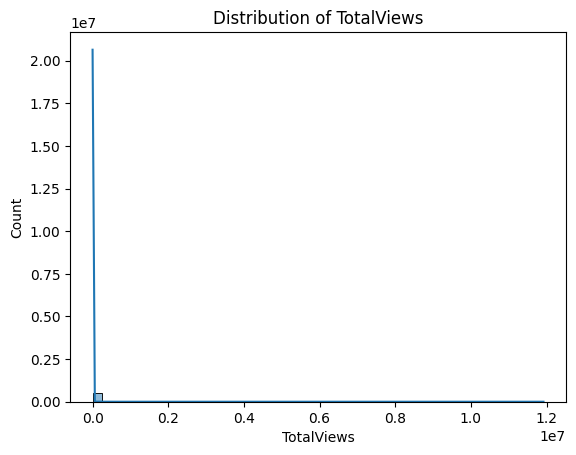

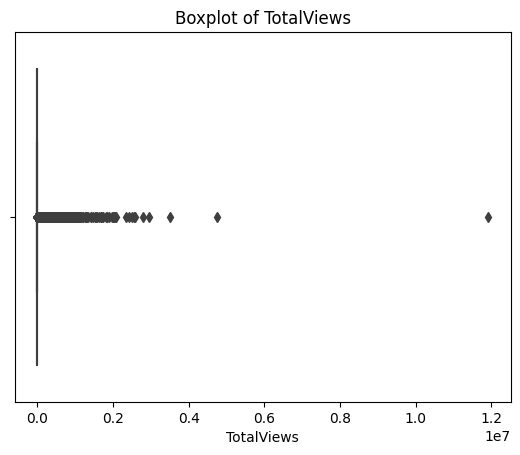

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


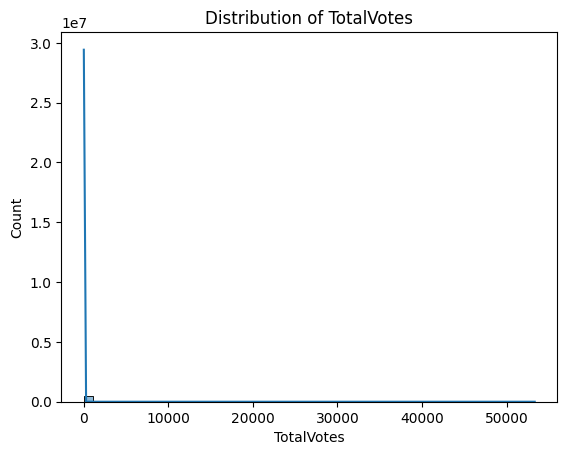

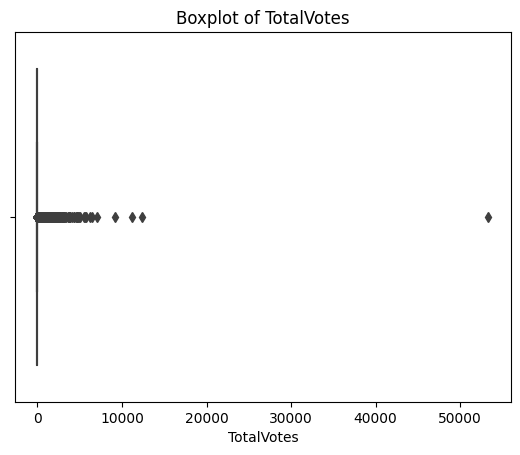

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


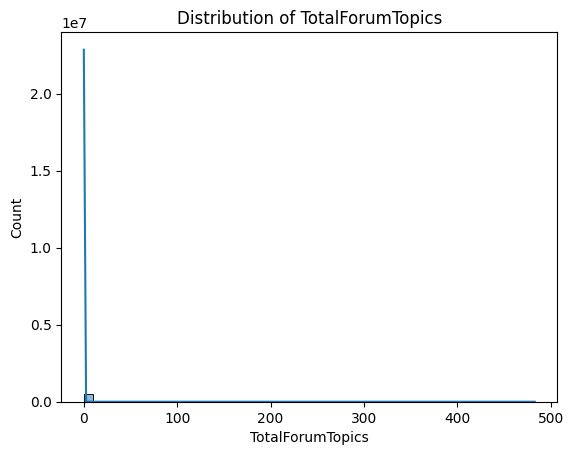

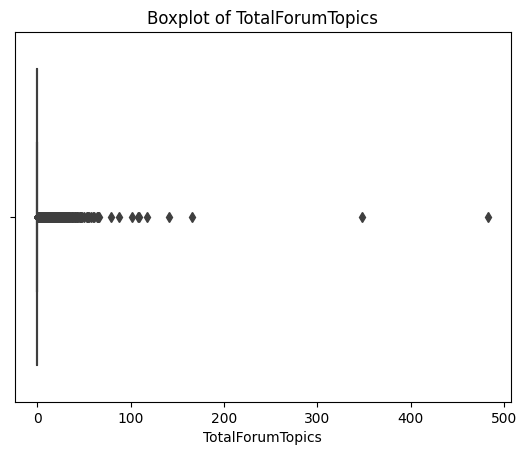

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in ['TotalViews', 'TotalVotes', 'TotalForumTopics']:
    plt.figure()
    sns.histplot(datasets_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure()
    sns.boxplot(x=datasets_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

*2.2. Correlation Matrix*

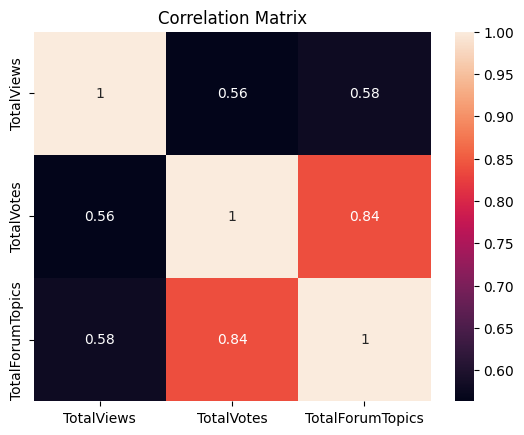

In [9]:
corr = datasets_df[['TotalViews', 'TotalVotes', 'TotalForumTopics']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

*2.3. Logarithmic transformation*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


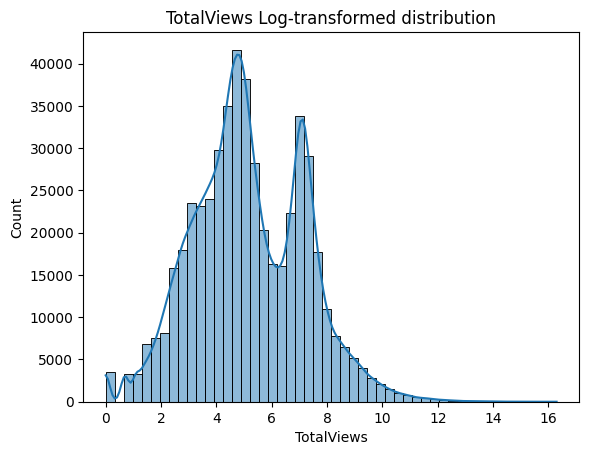

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


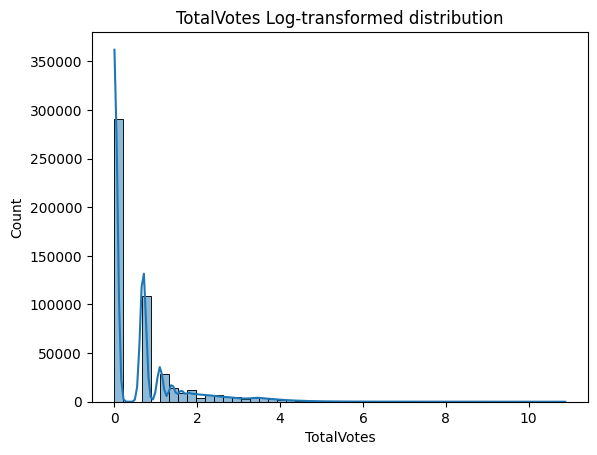

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


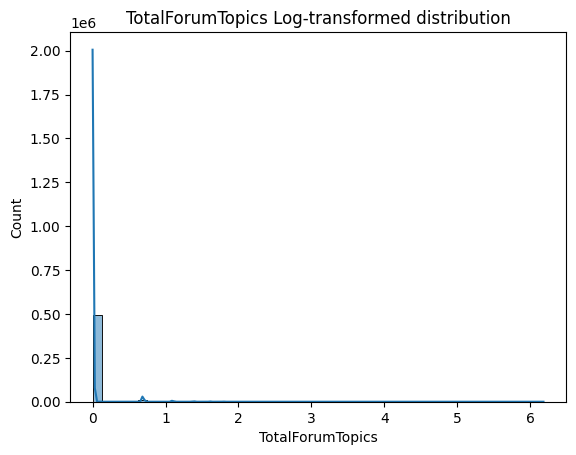

In [10]:
import numpy as np

for col in y_cols:
    plt.figure()
    sns.histplot(np.log1p(datasets_df[col]), bins=50, kde=True)
    plt.title(f'{col} Log-transformed distribution')
    plt.show()

**3. Feature (X) distribution analysis**

In [11]:
num_cols = [
    'TotalDownloads', 'TotalKernels', 'Medal',
    'OwnerUserId', 'OwnerOrganizationId',
    'CurrentDatasetVersionId', 'CurrentDatasourceVersionId'
]

cat_cols = [
    'Type'
]

time_cols = ['CreationDate', 'LastActivityDate', 'MedalAwardDate']

*3.1 Numerical features*

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


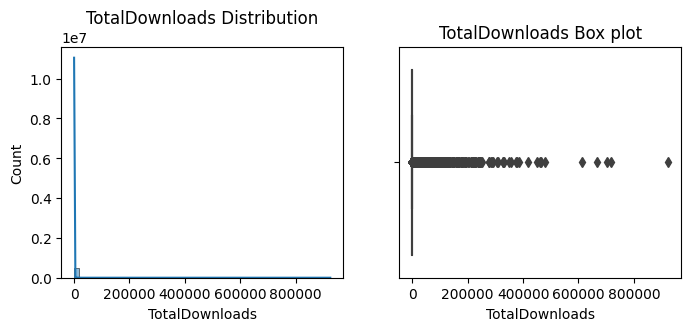

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


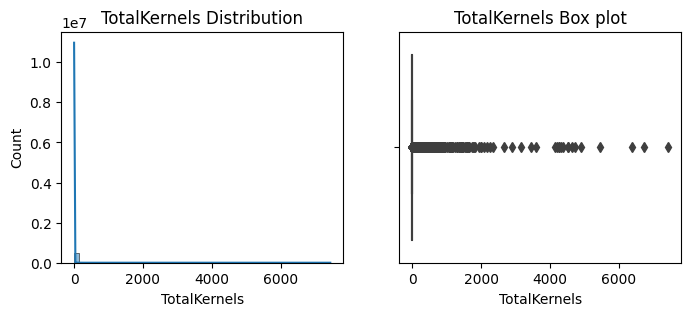

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


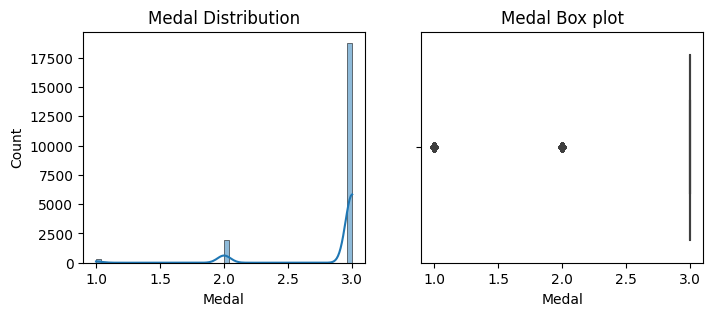

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


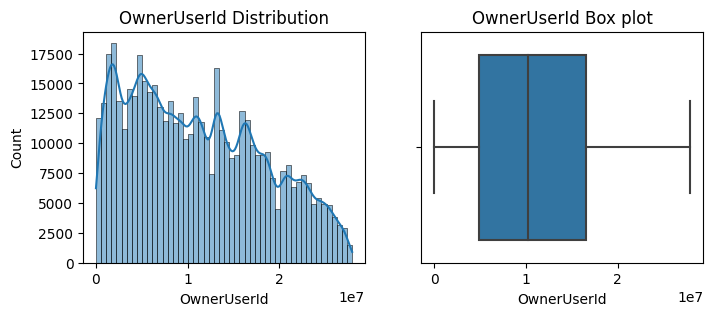

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


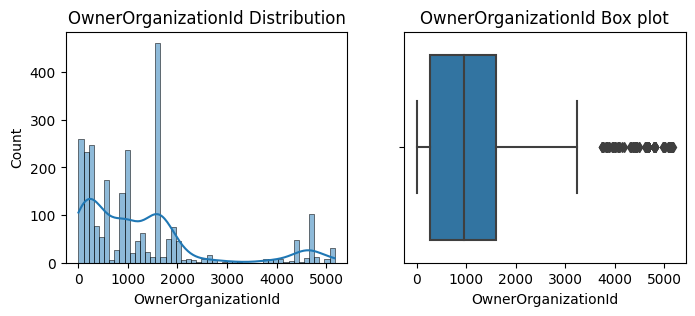

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


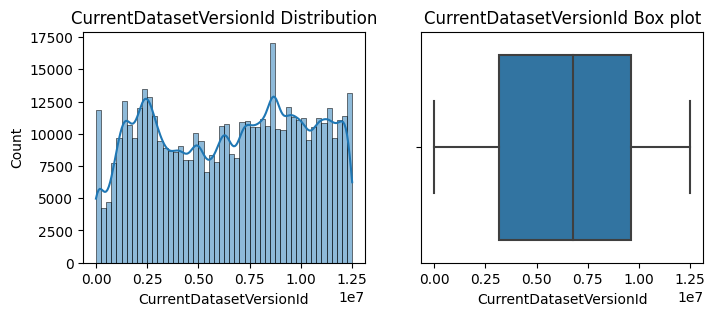

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


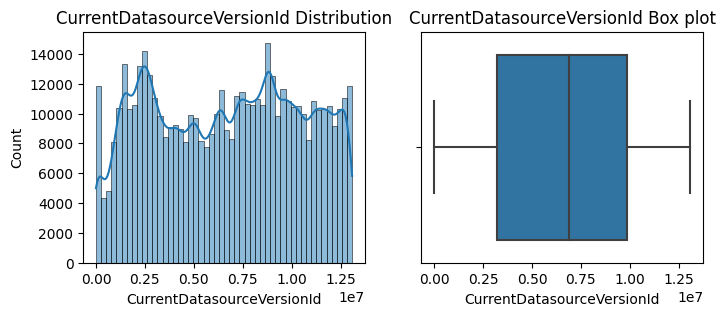

In [12]:
for col in num_cols:
    if col in datasets_df.columns:
        plt.figure(figsize=(8,3))
        plt.subplot(1,2,1)
        sns.histplot(datasets_df[col].dropna(), bins=50, kde=True)
        plt.title(f'{col} Distribution')
        plt.subplot(1,2,2)
        sns.boxplot(x=datasets_df[col].dropna())
        plt.title(f'{col} Box plot')
        plt.show()

*3.2. Category Statistics*

Type Number of each category:
 Type
Dataset    509640
Name: count, dtype: int64


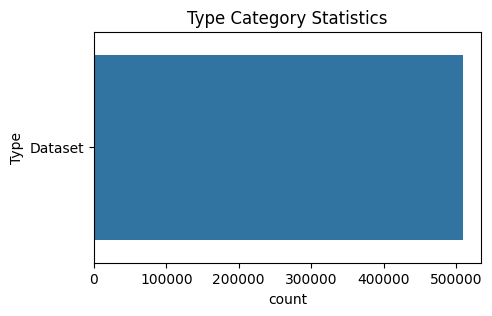

In [13]:
for col in cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of each category:\n", datasets_df[col].value_counts())
        plt.figure(figsize=(5,3))
        sns.countplot(y=col, data=datasets_df, order=datasets_df[col].value_counts().index)
        plt.title(f'{col} Category Statistics')
        plt.show()

*3.3. Missing and unique value analysis*

In [14]:
print("Missing values ​​for features：\n", datasets_df[num_cols + cat_cols].isnull().sum(),"\n")

for col in num_cols + cat_cols:
    if col in datasets_df.columns:
        print(f"{col} Number of unique values: {datasets_df[col].nunique()}")

Missing values ​​for features：
 TotalDownloads                     0
TotalKernels                       0
Medal                         488555
OwnerUserId                     2569
OwnerOrganizationId           507071
CurrentDatasetVersionId          239
CurrentDatasourceVersionId       250
Type                               0
dtype: int64 

TotalDownloads Number of unique values: 7640
TotalKernels Number of unique values: 486
Medal Number of unique values: 3
OwnerUserId Number of unique values: 187955
OwnerOrganizationId Number of unique values: 388
CurrentDatasetVersionId Number of unique values: 509401
CurrentDatasourceVersionId Number of unique values: 509390
Type Number of unique values: 1


**4. Feature Correlation and Extreme Value Analysis**

*4.1. Relationship between features and targets (X vs Y)*

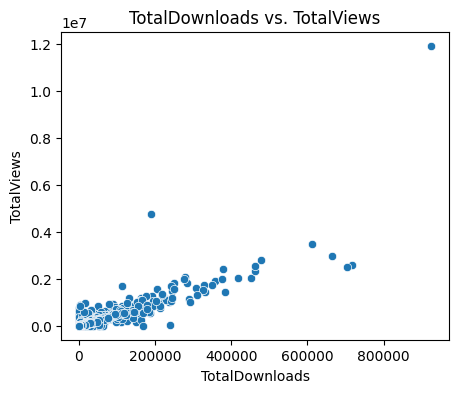

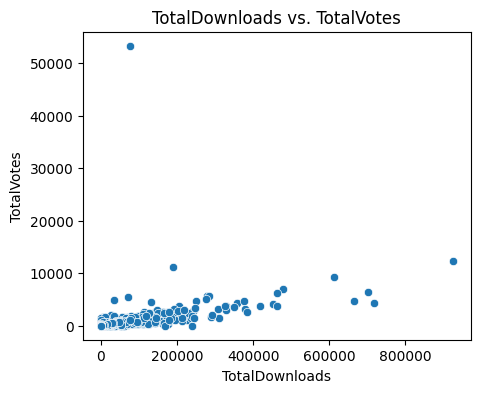

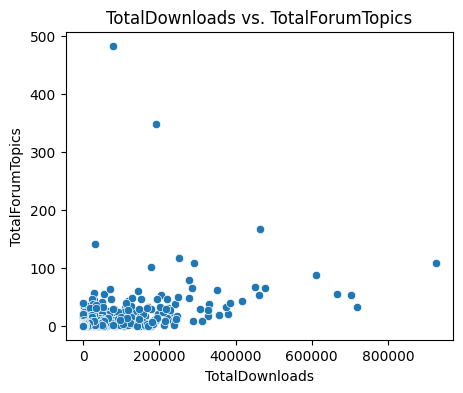

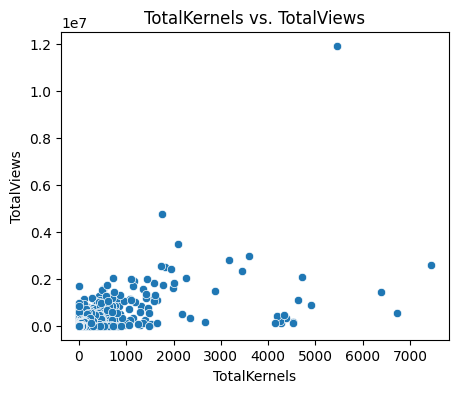

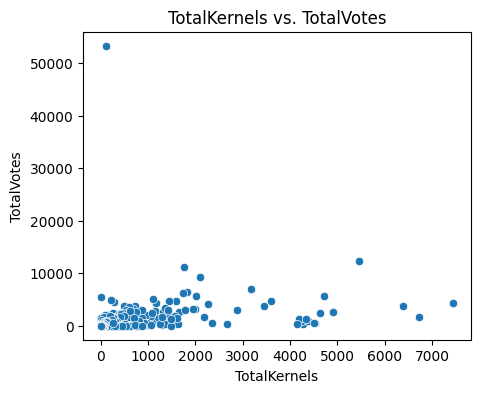

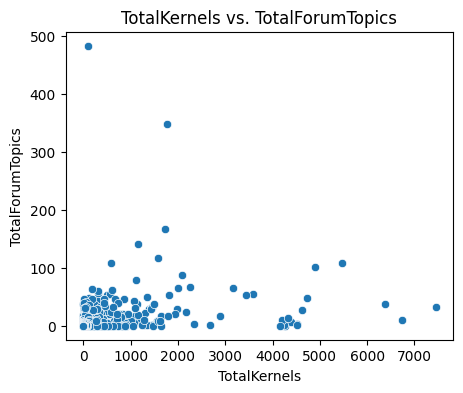

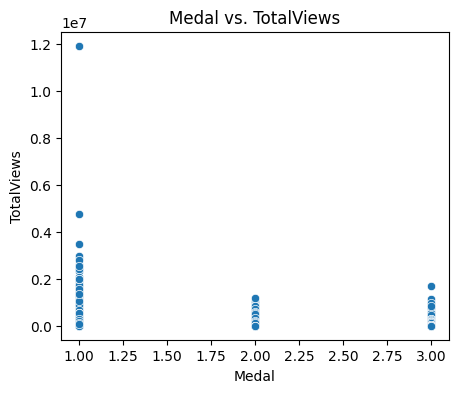

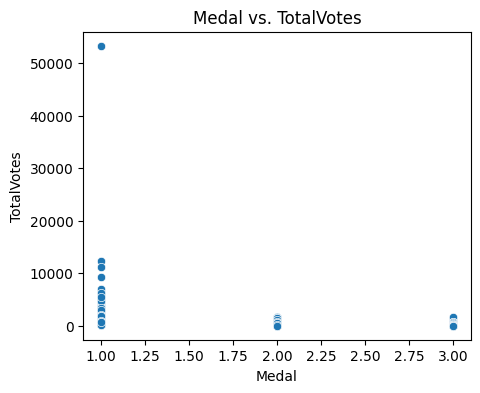

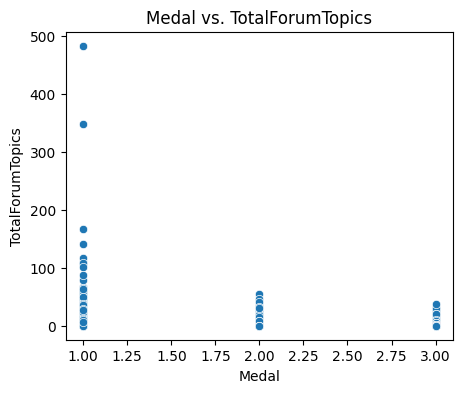

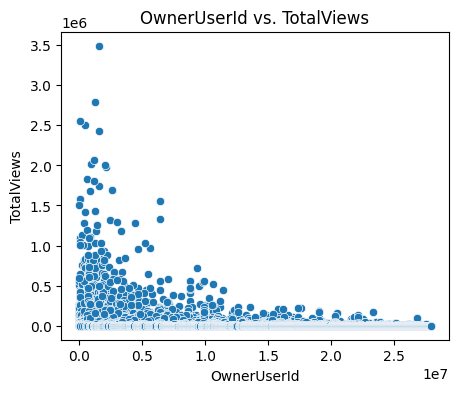

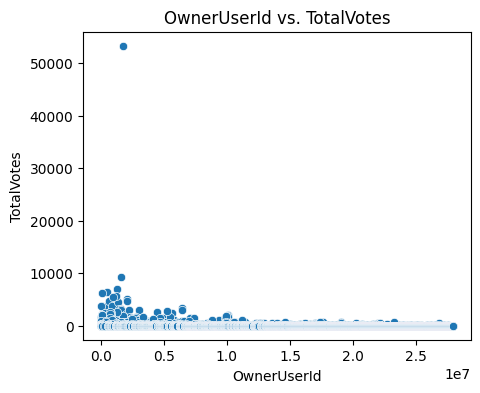

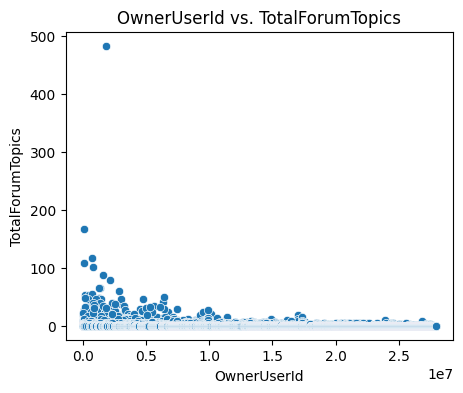

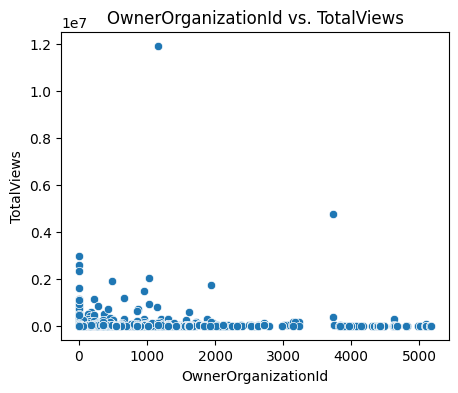

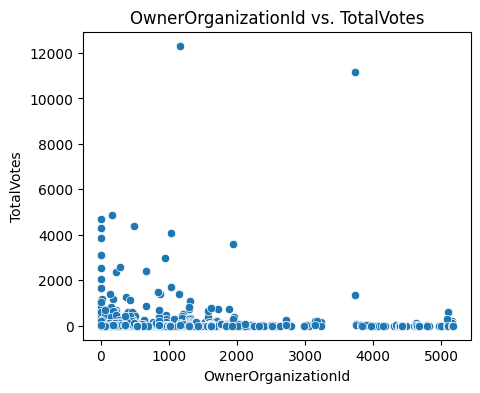

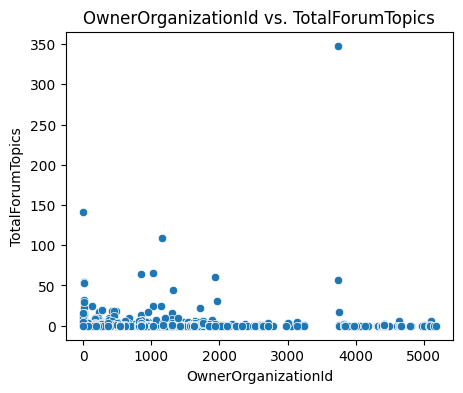

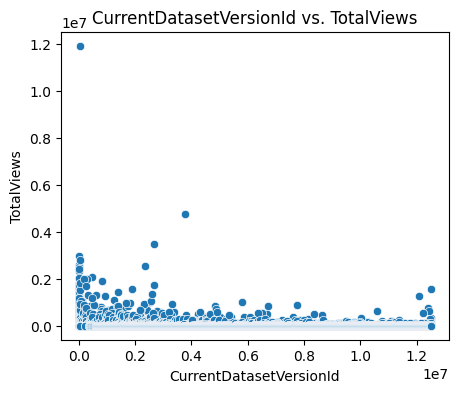

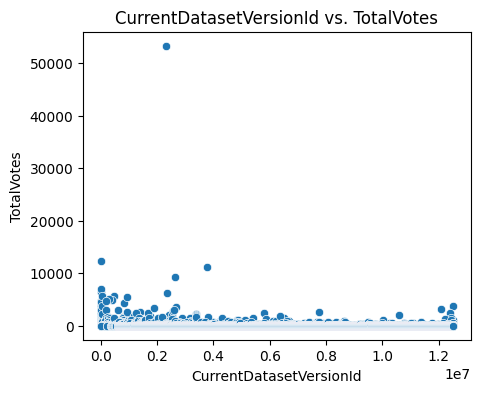

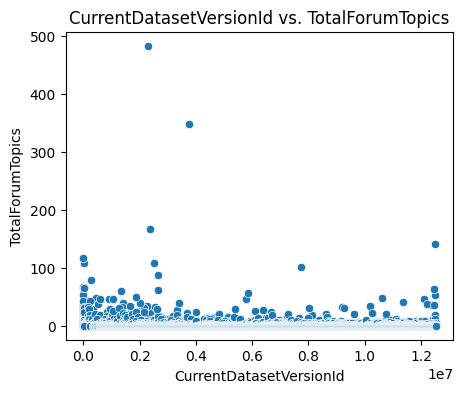

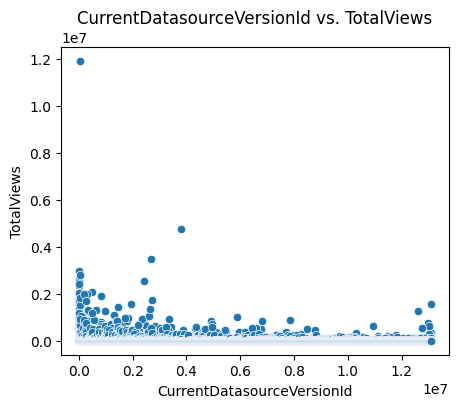

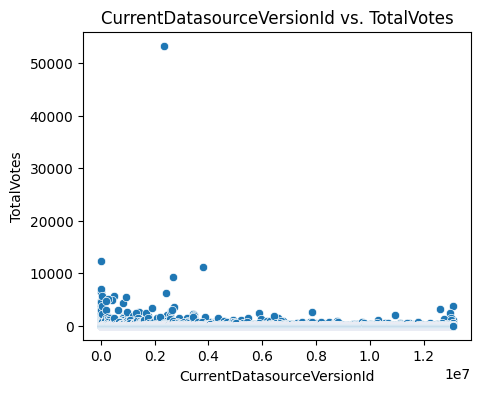

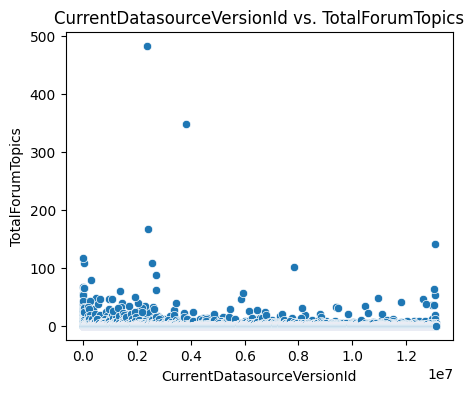

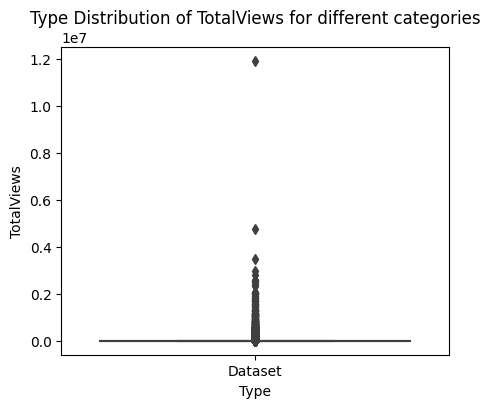

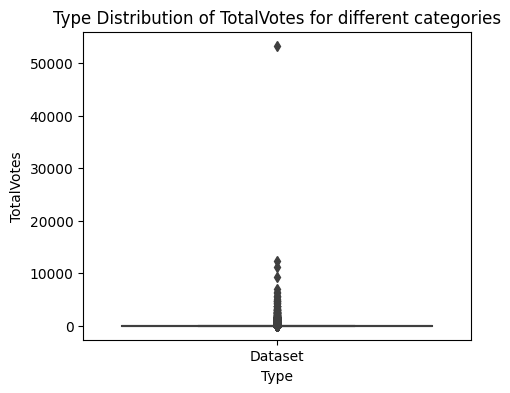

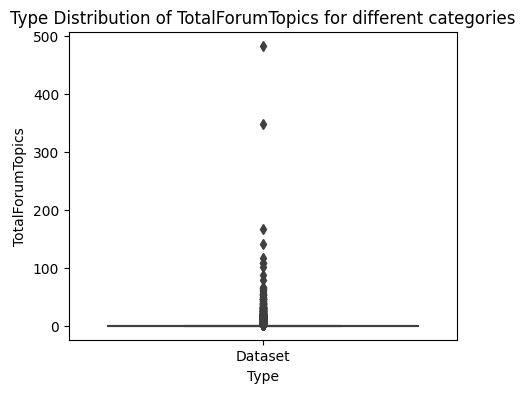

In [15]:
for x in num_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.scatterplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} vs. {y}')
            plt.show()
for x in cat_cols:
    if x in datasets_df.columns:
        for y in y_cols:
            plt.figure(figsize=(5,4))
            sns.boxplot(x=x, y=y, data=datasets_df)
            plt.title(f'{x} Distribution of {y} for different categories')
            plt.show()

*4.2. Correlation between features (x-x, x-y)*

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


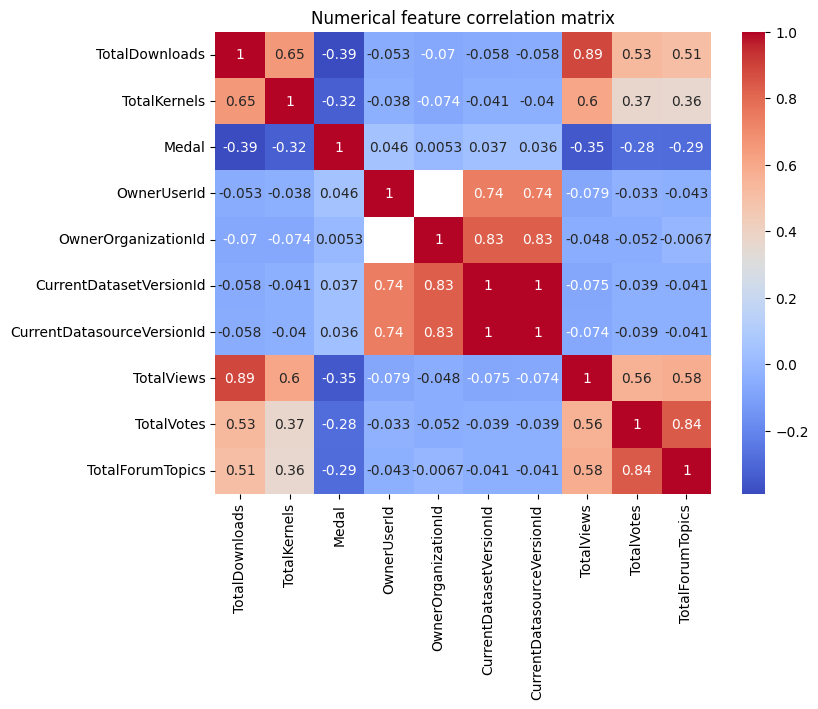

In [16]:
corr = datasets_df[num_cols + y_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numerical feature correlation matrix')
plt.show()

*4.3. Outlier and extreme value detection*

# DATA PRE-PROCESSING

In [17]:
for col in num_cols + y_cols:
    if col in datasets_df.columns:
        print(f"{col} Maximum/Minimum: {datasets_df[col].max()}/{datasets_df[col].min()}")

TotalDownloads Maximum/Minimum: 924906/0
TotalKernels Maximum/Minimum: 7446/0
Medal Maximum/Minimum: 3.0/1.0
OwnerUserId Maximum/Minimum: 27931884.0/368.0
OwnerOrganizationId Maximum/Minimum: 5172.0/2.0
CurrentDatasetVersionId Maximum/Minimum: 12513666.0/58.0
CurrentDatasourceVersionId Maximum/Minimum: 13094636.0/58.0
TotalViews Maximum/Minimum: 11919330/0
TotalVotes Maximum/Minimum: 53329/0
TotalForumTopics Maximum/Minimum: 483/0


In [18]:
df_before_preprocessing = datasets_df

# Drop columns with >50% missing values
high_null_cols = datasets_df.columns[datasets_df.isnull().mean() > 0.5]
print('Columns with >50% missing values:',high_null_cols)
datasets_df = datasets_df.loc[:, datasets_df.isnull().mean() < 0.5]

# Drop columns with only one unique value
single_value_cols = [col for col in datasets_df.columns if datasets_df[col].nunique() == 1]
print('Columns with only one unique value:',single_value_cols)
datasets_df = datasets_df.loc[:, datasets_df.nunique() > 1]

# Drop known irrelevant columns
datasets_df.drop(columns=['Id'], inplace=True, errors='ignore')
datasets_df.head()


Columns with >50% missing values: Index(['OwnerOrganizationId', 'Medal', 'MedalAwardDate'], dtype='object')
Columns with only one unique value: ['Type']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,CreatorUserId,OwnerUserId,CurrentDatasetVersionId,CurrentDatasourceVersionId,ForumId,CreationDate,LastActivityDate,TotalViews,TotalDownloads,TotalVotes,TotalKernels,TotalForumTopics
0,553913,553913.0,793501.0,815299.0,1110,03/08/2016 22:41:02,02/05/2018,89339,12292,293,144,4
1,1132983,NaN,7651.0,7651.0,975,12/18/2015 23:16:00,02/06/2018,253022,47499,406,452,8
2,993,NaN,827864.0,850525.0,977,12/21/2015 19:40:00,02/06/2018,533258,98358,904,496,9
3,993,NaN,799881.0,821798.0,984,12/28/2015 06:04:45,02/06/2018,112863,24953,142,209,5
4,993,NaN,742210.0,762847.0,989,01/07/2016 00:38:08,02/06/2018,779046,125292,1119,589,13


In [19]:
import pandas as pd

# Convert to datetime
datasets_df['CreationDate'] = pd.to_datetime(datasets_df['CreationDate'], errors='coerce')
datasets_df['LastActivityDate'] = pd.to_datetime(datasets_df['LastActivityDate'], errors='coerce')

# Create ActivityDuration in days
datasets_df['ActivityDuration'] = (datasets_df['LastActivityDate'] - datasets_df['CreationDate']).dt.days

# Handle invalid durations: replace negative values with median
median_duration = datasets_df.loc[datasets_df['ActivityDuration'] >= 0, 'ActivityDuration'].median()

datasets_df.loc[datasets_df['ActivityDuration'] < 0, 'ActivityDuration'] = median_duration

# Drop original date columns
datasets_df.drop(columns=['CreationDate', 'LastActivityDate'], inplace=True)

In [20]:
num_cols = datasets_df.select_dtypes(include='number').columns
fill_dict = {col: datasets_df[col].median() for col in num_cols}
datasets_df.fillna(value=fill_dict, inplace=True)

In [21]:
for col in num_cols:
    Q1 = datasets_df[col].quantile(0.25)
    Q3 = datasets_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    datasets_df = datasets_df[(datasets_df[col] >= lower) & (datasets_df[col] <= upper)]

In [22]:
# Apply log1p transformation
for col in y_cols:
    # Log-transform the column and replace it in the DataFrame
    datasets_df[col] = np.log1p(datasets_df[col])

In [23]:
X = datasets_df.drop(columns=y_cols)   
y = datasets_df[y_cols]

In [24]:
from sklearn.model_selection import train_test_split

# First split: Train+Val (80%) and Test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: Train (70%) and Val (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42
)
# 0.125 because 0.125 * 80% = 10%

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_val_scaled   = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [26]:
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (261663, 8) (261663, 3)
Validation shape: (37381, 8) (37381, 3)
Test shape: (74761, 8) (74761, 3)


# Model Training

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ---- Adaptive Hyperparameter Tuning ----
def evaluate_on_val(alpha):
    model = MultiOutputRegressor(Ridge(alpha=alpha))
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_val_scaled)
    mse_scores = [mean_squared_error(y_val.iloc[:, i], preds[:, i]) for i in range(y_val.shape[1])]
    avg_mse = np.mean(mse_scores)
    return alpha, avg_mse, model

# Initial setup
alpha_range = [0.01, 0.1, 1.0, 10.0, 100.0]
best_alpha = None
best_mse = float('inf')
best_model = None
tolerance = 1e-3
max_rounds = 10
round_num = 1

print("Starting Adaptive Hyperparameter Tuning...\n")

while round_num <= max_rounds:
    print(f"Round {round_num} - Alpha values tested: {np.round(alpha_range, 5)}")
    results = [evaluate_on_val(alpha) for alpha in alpha_range]
    
    round_best_alpha, round_best_mse, round_best_model = min(results, key=lambda x: x[1])
    print(f"Best Alpha in Round {round_num}: {round_best_alpha:.5f} | Validation MSE: {round_best_mse:.5f}")
    
    if best_alpha is not None and abs(best_mse - round_best_mse) < tolerance:
        print(f"Stopping early due to minimal improvement (< {tolerance:.5f})")
        break
    
    best_alpha = round_best_alpha
    best_mse = round_best_mse
    best_model = round_best_model
    
    lower = max(1e-6, best_alpha * 0.5)
    upper = best_alpha * 1.5
    alpha_range = np.linspace(lower, upper, 5)
    
    round_num += 1

print(f"\nFinal best alpha after {round_num - 1} rounds: {best_alpha:.5f}")

# ---- Final Model Training on Train + Validation ----
X_combined = pd.concat([X_train_scaled, X_val_scaled])
y_combined = pd.concat([y_train, y_val])

final_model = MultiOutputRegressor(Ridge(alpha=best_alpha))
final_model.fit(X_combined, y_combined)

# After Ridge Regression final evaluation
y_test_pred_ridge = final_model.predict(X_test_scaled)

# ---- Final Evaluation ----
print("\nFinal Evaluation on Test Set:")
for i in range(y_test.shape[1]):
    print(f"Output {i + 1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_ridge[:, i]):.4f}, "
          f"Test R^2: {r2_score(y_test.iloc[:, i], y_test_pred_ridge[:, i]):.4f}")


# Create DataFrame for neat tabular display
results_df = pd.DataFrame(results)

Starting Adaptive Hyperparameter Tuning...

Round 1 - Alpha values tested: [1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]
Best Alpha in Round 1: 10.00000 | Validation MSE: 0.25304
Round 2 - Alpha values tested: [ 5.   7.5 10.  12.5 15. ]
Best Alpha in Round 2: 7.50000 | Validation MSE: 0.25304
Stopping early due to minimal improvement (< 0.00100)

Final best alpha after 1 rounds: 10.00000

Final Evaluation on Test Set:
Output 1 - Test MSE: 0.6836, Test R^2: 0.7403
Output 2 - Test MSE: 0.0814, Test R^2: 0.3271
Output 3 - Test MSE: 0.0000, Test R^2: 1.0000


In [29]:
# import multiprocessing
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# # ---- Tuning Function (Runs in a Separate Process) ----
# def adaptive_rf_tuning(queue, X_train, y_train, X_val, y_val, X_test, y_test):
#     def evaluate_rf_on_val(n_estimators):
#         model = MultiOutputRegressor(RandomForestRegressor(n_estimators=int(n_estimators), random_state=42, n_jobs=-1))
#         model.fit(X_train, y_train)
#         preds = model.predict(X_val)
#         mse_scores = [mean_squared_error(y_val.iloc[:, i], preds[:, i]) for i in range(y_val.shape[1])]
#         avg_mse = np.mean(mse_scores)
#         return n_estimators, avg_mse, model

#     n_estimators_range = [10, 25, 40, 55, 75, 100]
#     best_n_estimators = None
#     best_mse = float('inf')
#     best_model = None
#     tolerance = 1e-3
#     max_rounds = 10
#     round_num = 1
#     results = []

#     print("Starting Adaptive Hyperparameter Tuning for Random Forest...\n")

#     while round_num <= max_rounds:
#         print(f"Round {round_num} - n_estimators values tested: {np.round(n_estimators_range, 0).astype(int)}")
#         round_results = [evaluate_rf_on_val(n) for n in n_estimators_range]
#         results.extend(round_results)

#         round_best_n, round_best_mse, round_best_model = min(round_results, key=lambda x: x[1])
#         print(f"Best n_estimators in Round {round_num}: {int(round_best_n)} | Validation MSE: {round_best_mse:.5f}")

#         if best_n_estimators is not None and abs(best_mse - round_best_mse) < tolerance:
#             print(f"Stopping early due to minimal improvement (< {tolerance:.5f})")
#             break

#         best_n_estimators = round_best_n
#         best_mse = round_best_mse
#         best_model = round_best_model

#         lower = max(10, best_n_estimators - 25)
#         upper = best_n_estimators + 25
#         n_estimators_range = np.linspace(lower, upper, 5)
#         round_num += 1

#     print(f"\nFinal best n_estimators after {round_num - 1} rounds: {int(best_n_estimators)}")

#     X_combined = pd.concat([X_train, X_val])
#     y_combined = pd.concat([y_train, y_val])

#     final_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=int(best_n_estimators), random_state=42, n_jobs=-1))
#     final_model.fit(X_combined, y_combined)
#     y_test_pred = final_model.predict(X_test)

#     print("\nFinal Evaluation on Test Set:")
#     for i in range(y_test.shape[1]):
#         print(f"Output {i + 1} - "
#               f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred[:, i]):.4f}, "
#               f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred[:, i]):.4f}")

#     results_df = pd.DataFrame(results, columns=['n_estimators', 'Validation MSE', 'Model'])
#     queue.put((best_n_estimators, results_df))


# # ---- Wrapper with Timeout ----
# if __name__ == "__main__":
#     queue = multiprocessing.Queue()
#     process = multiprocessing.Process(
#         target=adaptive_rf_tuning,
#         args=(queue, X_train, y_train, X_val, y_val, X_test, y_test)
#     )
#     process.start()

#     process.join(timeout=600)  # 10 minutes = 600 seconds

#     if process.is_alive():
#         process.terminate()
#         print("Stopped after 10 minutes. Random Forest tuning did not complete — model is too slow or complex.")
#     else:
#         best_n_estimators, results_df = queue.get()
#         print(f"\nTuning completed successfully. Best n_estimators: {int(best_n_estimators)}")
#         print(results_df[['n_estimators', 'Validation MSE']].to_string(index=False))


In [30]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ---- Adaptive Hyperparameter Tuning for XGBRegressor ----
def evaluate_xgb_on_val(n_estimators):
    model = MultiOutputRegressor(XGBRegressor(n_estimators=int(n_estimators), random_state=42, verbosity=0))
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mse_scores = [mean_squared_error(y_val.iloc[:, i], preds[:, i]) for i in range(y_val.shape[1])]
    avg_mse = np.mean(mse_scores)
    return n_estimators, avg_mse, model

# Initial setup
n_estimators_range = [10,25,40,55,75,100]
best_n_estimators = None
best_mse = float('inf')
best_model = None
tolerance = 1e-3
max_rounds = 10
round_num = 1

print("Starting Adaptive Hyperparameter Tuning for XGBoost...\n")

while round_num <= max_rounds:
    print(f"Round {round_num} - n_estimators values tested: {np.round(n_estimators_range, 0).astype(int)}")
    results = [evaluate_xgb_on_val(n) for n in n_estimators_range]
    
    round_best_n, round_best_mse, round_best_model = min(results, key=lambda x: x[1])
    print(f"Best n_estimators in Round {round_num}: {int(round_best_n)} | Validation MSE: {round_best_mse:.5f}")
    
    if best_n_estimators is not None and abs(best_mse - round_best_mse) < tolerance:
        print(f"Stopping early due to minimal improvement (< {tolerance:.5f})")
        break
    
    best_n_estimators = round_best_n
    best_mse = round_best_mse
    best_model = round_best_model
    
    # Narrow search around best n_estimators for next round
    lower = max(10, best_n_estimators - 25)
    upper = best_n_estimators + 25
    n_estimators_range = np.linspace(lower, upper, 5)
    
    round_num += 1

print(f"\nFinal best n_estimators after {round_num - 1} rounds: {int(best_n_estimators)}")

# ---- Final Model Training on Train + Validation ----
X_combined = pd.concat([X_train, X_val])
y_combined = pd.concat([y_train, y_val])

final_model = MultiOutputRegressor(XGBRegressor(n_estimators=int(best_n_estimators), random_state=42, verbosity=0))
final_model.fit(X_combined, y_combined)

# After XGBoost final evaluation
y_test_pred_xgb = final_model.predict(X_test)

# ---- Final Evaluation ----
print("\nFinal Evaluation on Test Set:")
for i in range(y_test.shape[1]):
    print(f"Output {i + 1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_xgb[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_xgb[:, i]):.4f}")

# Create DataFrame for neat tabular display of last round results
results_df = pd.DataFrame(results, columns=['n_estimators', 'Validation MSE', 'Model'])



Starting Adaptive Hyperparameter Tuning for XGBoost...

Round 1 - n_estimators values tested: [ 10  25  40  55  75 100]
Best n_estimators in Round 1: 100 | Validation MSE: 0.15981
Round 2 - n_estimators values tested: [ 75  88 100 112 125]
Best n_estimators in Round 2: 125 | Validation MSE: 0.15946
Stopping early due to minimal improvement (< 0.00100)

Final best n_estimators after 1 rounds: 100

Final Evaluation on Test Set:
Output 1 - Test MSE: 0.4184, Test R²: 0.8410
Output 2 - Test MSE: 0.0678, Test R²: 0.4395
Output 3 - Test MSE: 0.0000, Test R²: 1.0000


2025-07-19 22:02:03.243756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752962523.461084      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752962523.524077      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 22:02:17.638070: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


8177/8177 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3590 - mae: 0.3050 - val_loss: 0.2086 - val_mae: 0.2511
Epoch 2/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.1990 - mae: 0.2486 - val_loss: 0.1859 - val_mae: 0.2401
Epoch 3/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.1871 - mae: 0.2387 - val_loss: 0.1820 - val_mae: 0.2337
Epoch 4/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1839 - mae: 0.2359 - val_loss: 0.1778 - val_mae: 0.2331
Epoch 5/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.1811 - mae: 0.2340 - val_loss: 0.1770 - val_mae: 0.2300
Epoch 6/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1809 - mae: 0.2329 - val_loss: 0.1847 - val_mae: 0.2399
Epoch 7/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.1805 - mae: 0.2327 - val_loss: 0.1781 - val_mae: 0.2347
Epoch 8/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.1799 - mae: 0.2321 - val_loss: 0.1777 - val_mae: 0.2293
Epoch 9/10
8177/8177 ━━━━━━━━━━━━━━━━━━━━ 1

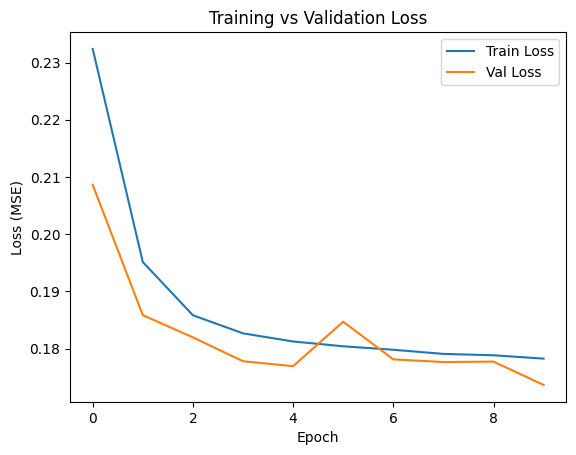

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3)  # Output layer for 3 continuous targets
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
# After Neural Network final evaluation
y_test_pred_nn = model.predict(X_test_scaled)

print("TensorFlow Keras Model Evaluation:")
for i in range(3):
    print(f"Output {i+1} - "
          f"Test MSE: {mean_squared_error(y_test.iloc[:, i], y_test_pred_nn[:, i]):.4f}, "
          f"Test R²: {r2_score(y_test.iloc[:, i], y_test_pred_nn[:, i]):.4f}")

# Optional: Plot training/validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


# Model Evaluation

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    avg_mse, avg_r2 = 0, 0
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true.iloc[:, i], y_pred[:, i])
        r2 = r2_score(y_true.iloc[:, i], y_pred[:, i])
        avg_mse += mse
        avg_r2 += r2
        print(f"Output {i+1}: MSE = {mse:.4f}, R² = {r2:.4f}")
    print("_"*35)
    print(f"Avg MSE: {avg_mse / y_true.shape[1]:.4f}, Avg R²: {avg_r2 / y_true.shape[1]:.4f}")
    print("_"*35,end="\n"*2)
    
# Call it for each model
evaluate("Ridge Regression", y_test, y_test_pred_ridge)
evaluate("XGBoost", y_test, y_test_pred_xgb)
evaluate("Neural Network", y_test, y_test_pred_nn)


Ridge Regression Evaluation:
Output 1: MSE = 0.6836, R² = 0.7403
Output 2: MSE = 0.0814, R² = 0.3271
Output 3: MSE = 0.0000, R² = 1.0000
___________________________________
Avg MSE: 0.2550, Avg R²: 0.6891
___________________________________

XGBoost Evaluation:
Output 1: MSE = 0.4184, R² = 0.8410
Output 2: MSE = 0.0678, R² = 0.4395
Output 3: MSE = 0.0000, R² = 1.0000
___________________________________
Avg MSE: 0.1620, Avg R²: 0.7602
___________________________________

Neural Network Evaluation:
Output 1: MSE = 0.4556, R² = 0.8269
Output 2: MSE = 0.0730, R² = 0.3960
Output 3: MSE = 0.0000, R² = 0.0000
___________________________________
Avg MSE: 0.1762, Avg R²: 0.4076
___________________________________



***We evaluated three regression models: Ridge Regression, a Neural Network, and XGBoost. Based on performance on the test set, XGBoost achieved the lowest average Mean Squared Error and the highest average R² score. It consistently outperformed the other models on all targets, making it the most suitable model for our task.***


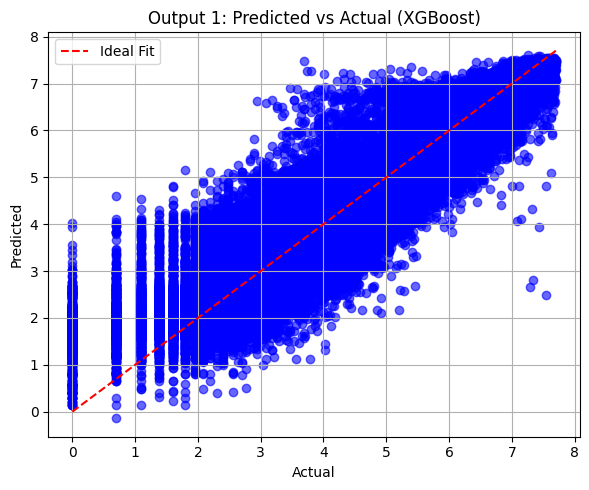

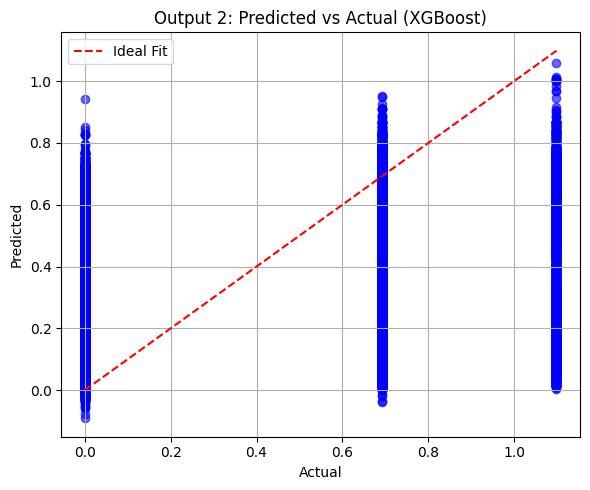

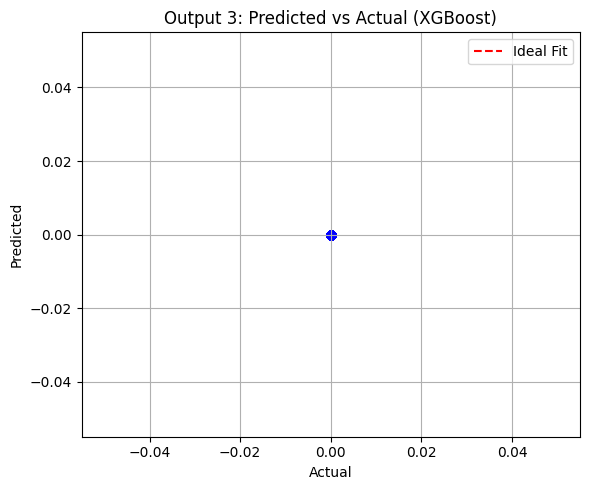

In [33]:
import matplotlib.pyplot as plt

for i in range(y_test.shape[1]):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_test.iloc[:, i], y_test_pred_xgb[:, i], alpha=0.6, color='blue')
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             'r--', label='Ideal Fit')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Output {i+1}: Predicted vs Actual (XGBoost)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


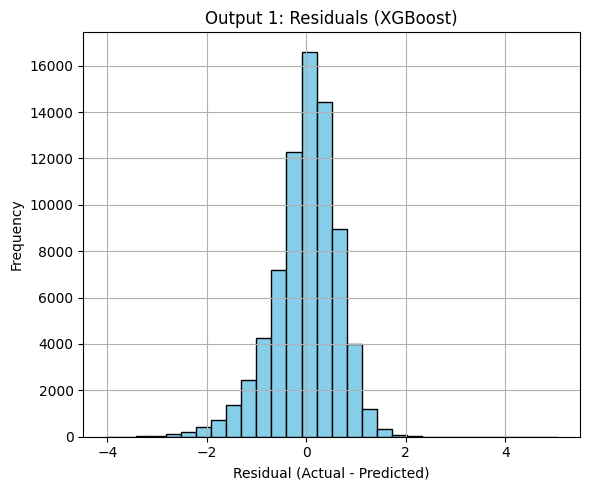

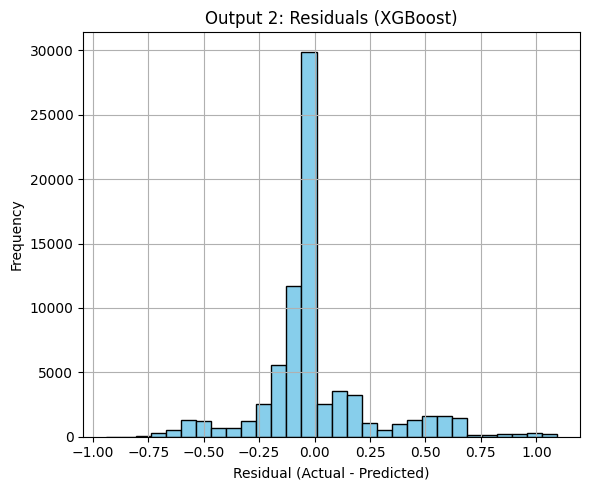

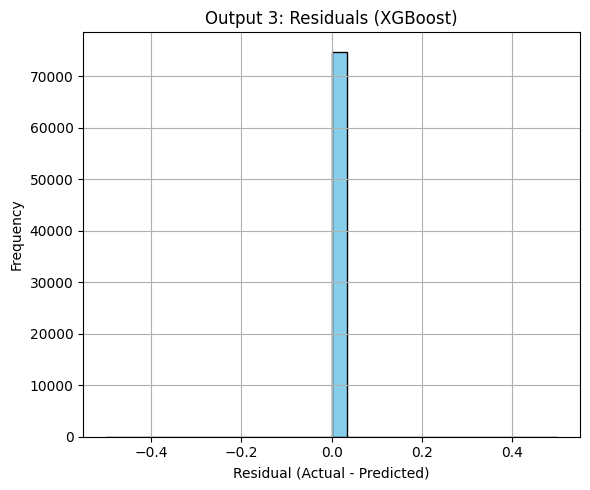

In [34]:
for i in range(y_test.shape[1]):
    residuals = y_test.iloc[:, i] - y_test_pred_xgb[:, i]
    plt.figure(figsize=(6, 5))
    plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Output {i+1}: Residuals (XGBoost)")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [35]:
import pandas as pd

# Create a placeholder output file for submission
placeholder = pd.DataFrame({
    "note": ["This is a placeholder output for Kaggle submission requirement."]
})
placeholder.to_csv("submission.csv", index=False)
